In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm


ff1.Cache.enable_cache('2023Austria') 
fp = ff1.get_session(2023, 'Austria', 'R')
fp.load()

Text(0.5, 0, 'Lap')

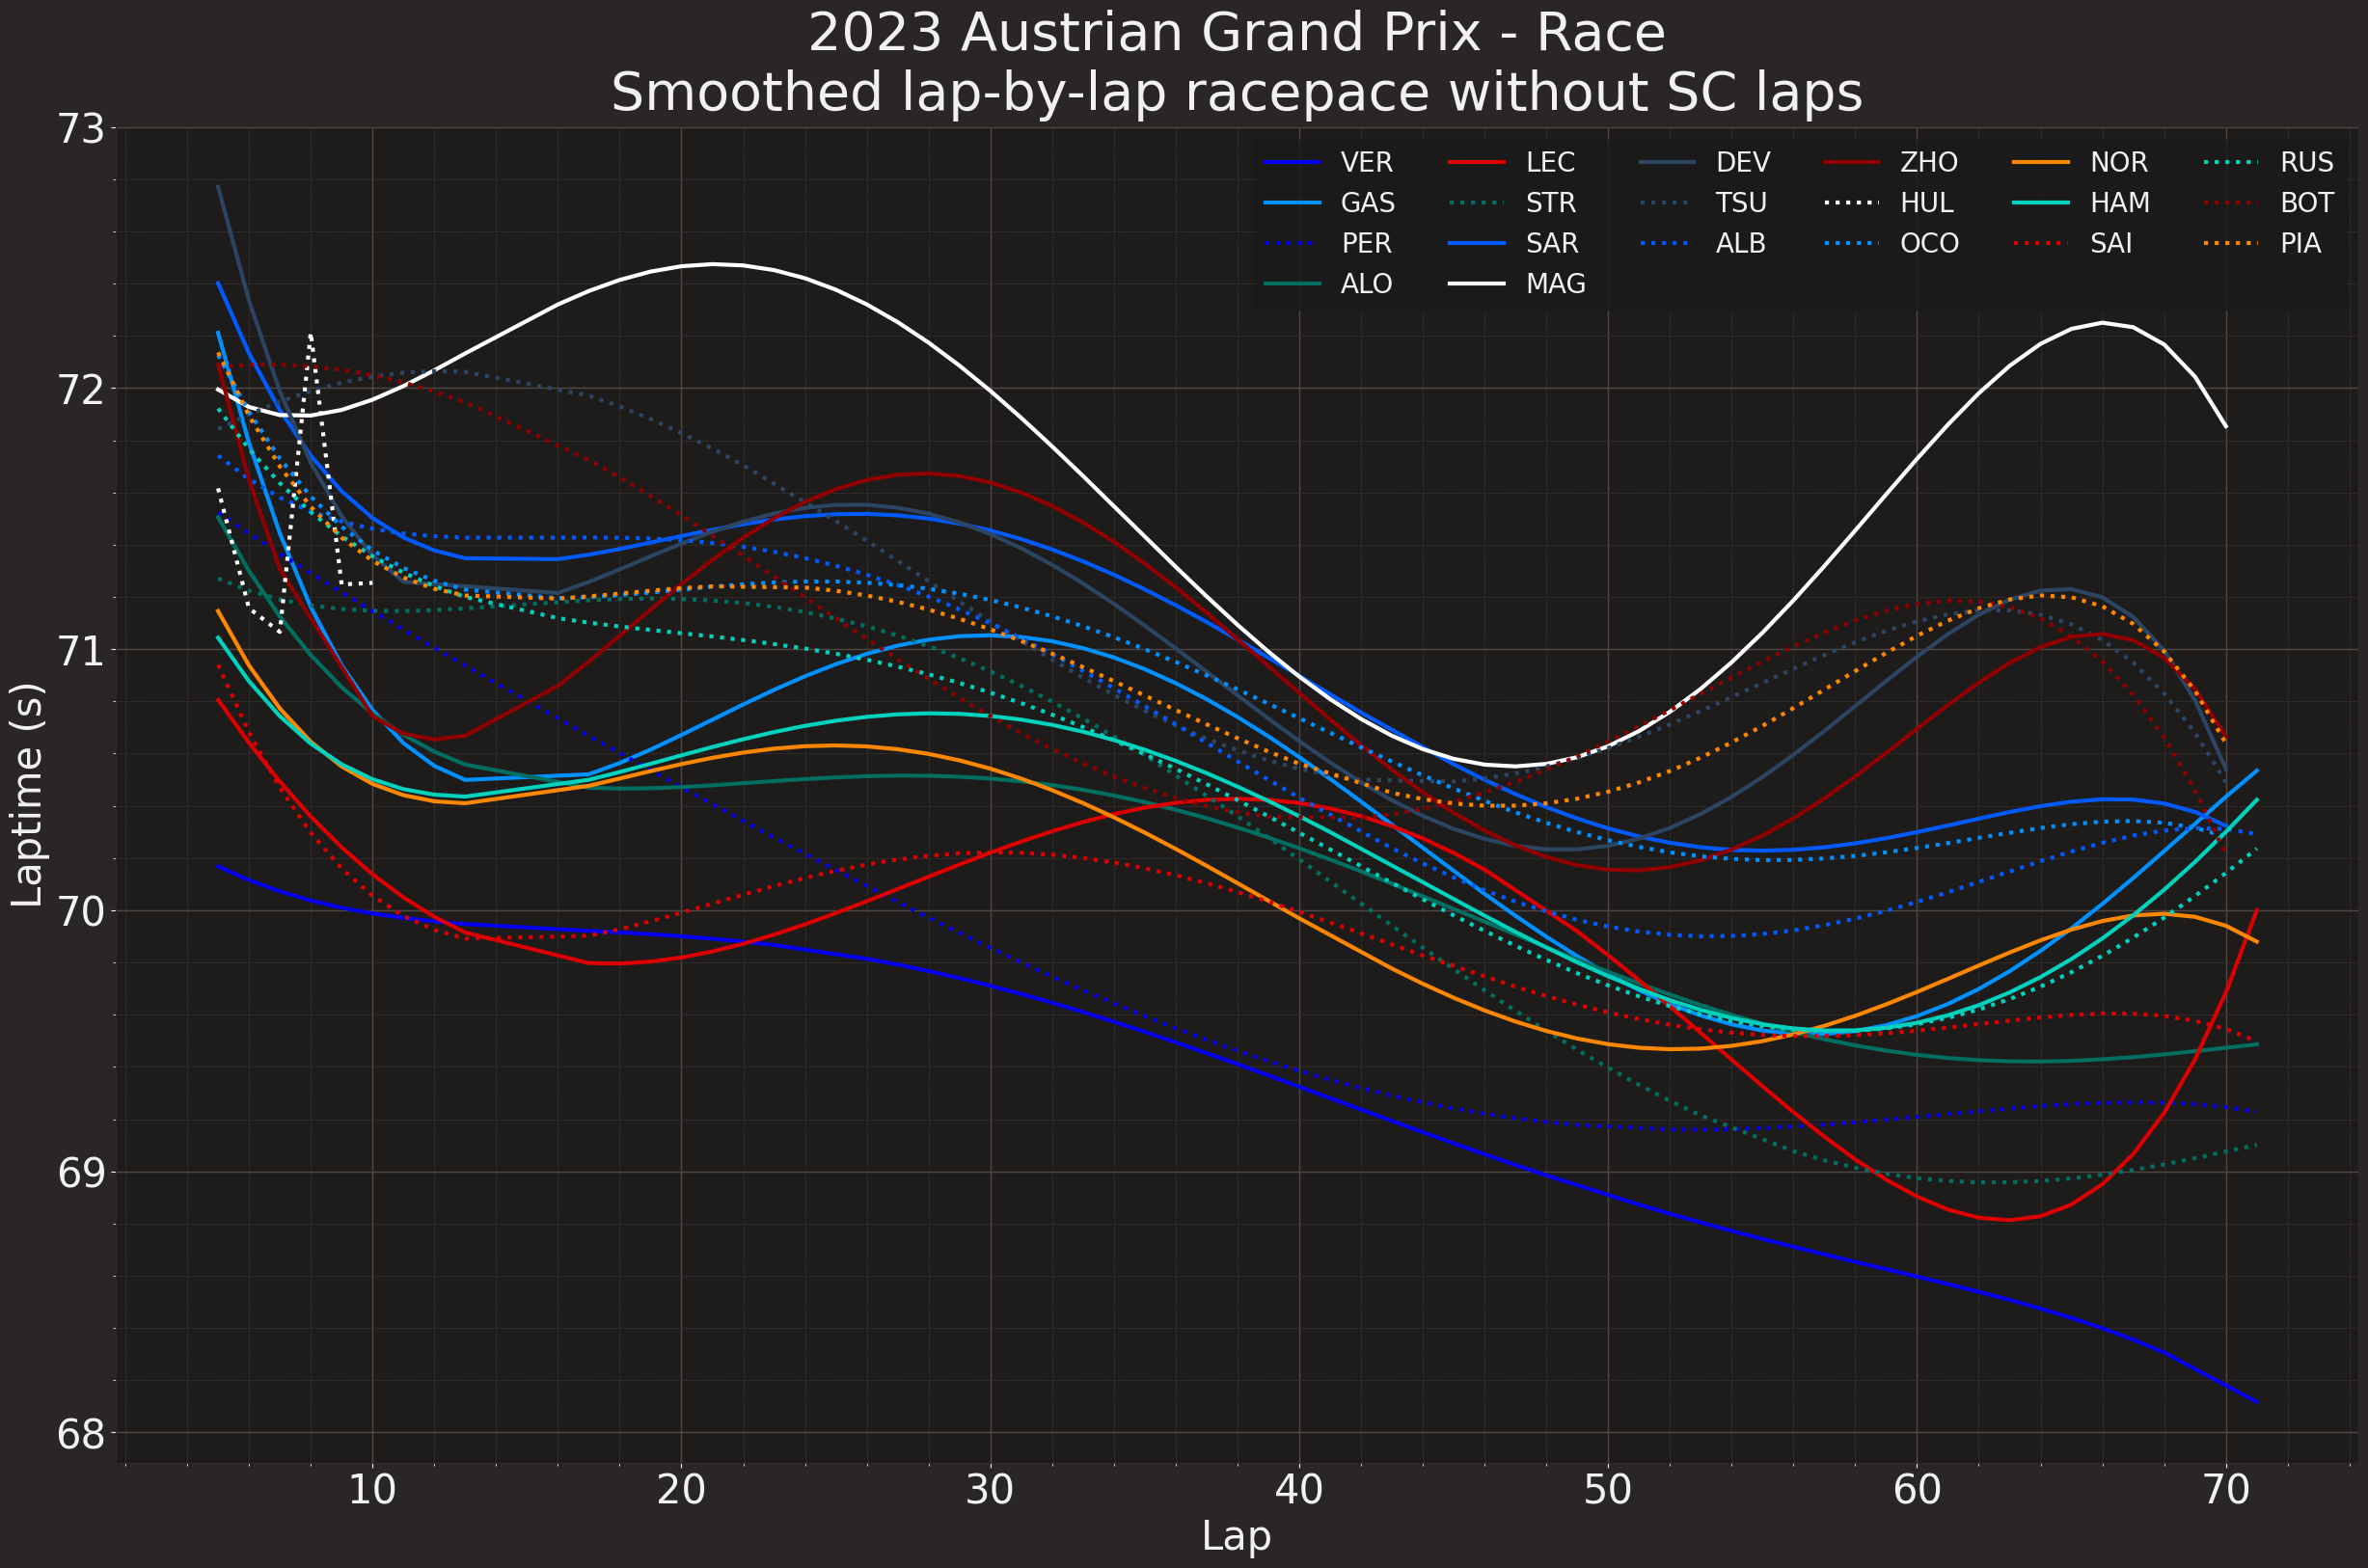

In [7]:
laps=fp.laps
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull() & laps['IsAccurate']==True)]

# Also, we remove outliers since those don't represent the racepace,
# using the Inter-Quartile Range (IQR) proximity rule
q75, q25 = laps['LapTimeSeconds'].quantile(0.75), laps['LapTimeSeconds'].quantile(0.25)

intr_qr = q75 - q25

drivers_to_visualize = pd.unique(fp.laps['Driver'])

ff1.plotting.setup_mpl()
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []
team_colors = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(1)


##############################
#
# Lap-by-lap racepace comparison
#
##############################
for driver in drivers_to_visualize:

    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=3)
        
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nSmoothed lap-by-lap racepace without SC laps", fontsize=40)

    # Generate legend
    ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
    ax.tick_params(labelsize=30)
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)
plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("Lap", fontsize=30)

Text(0.5, 0, 'Lap')

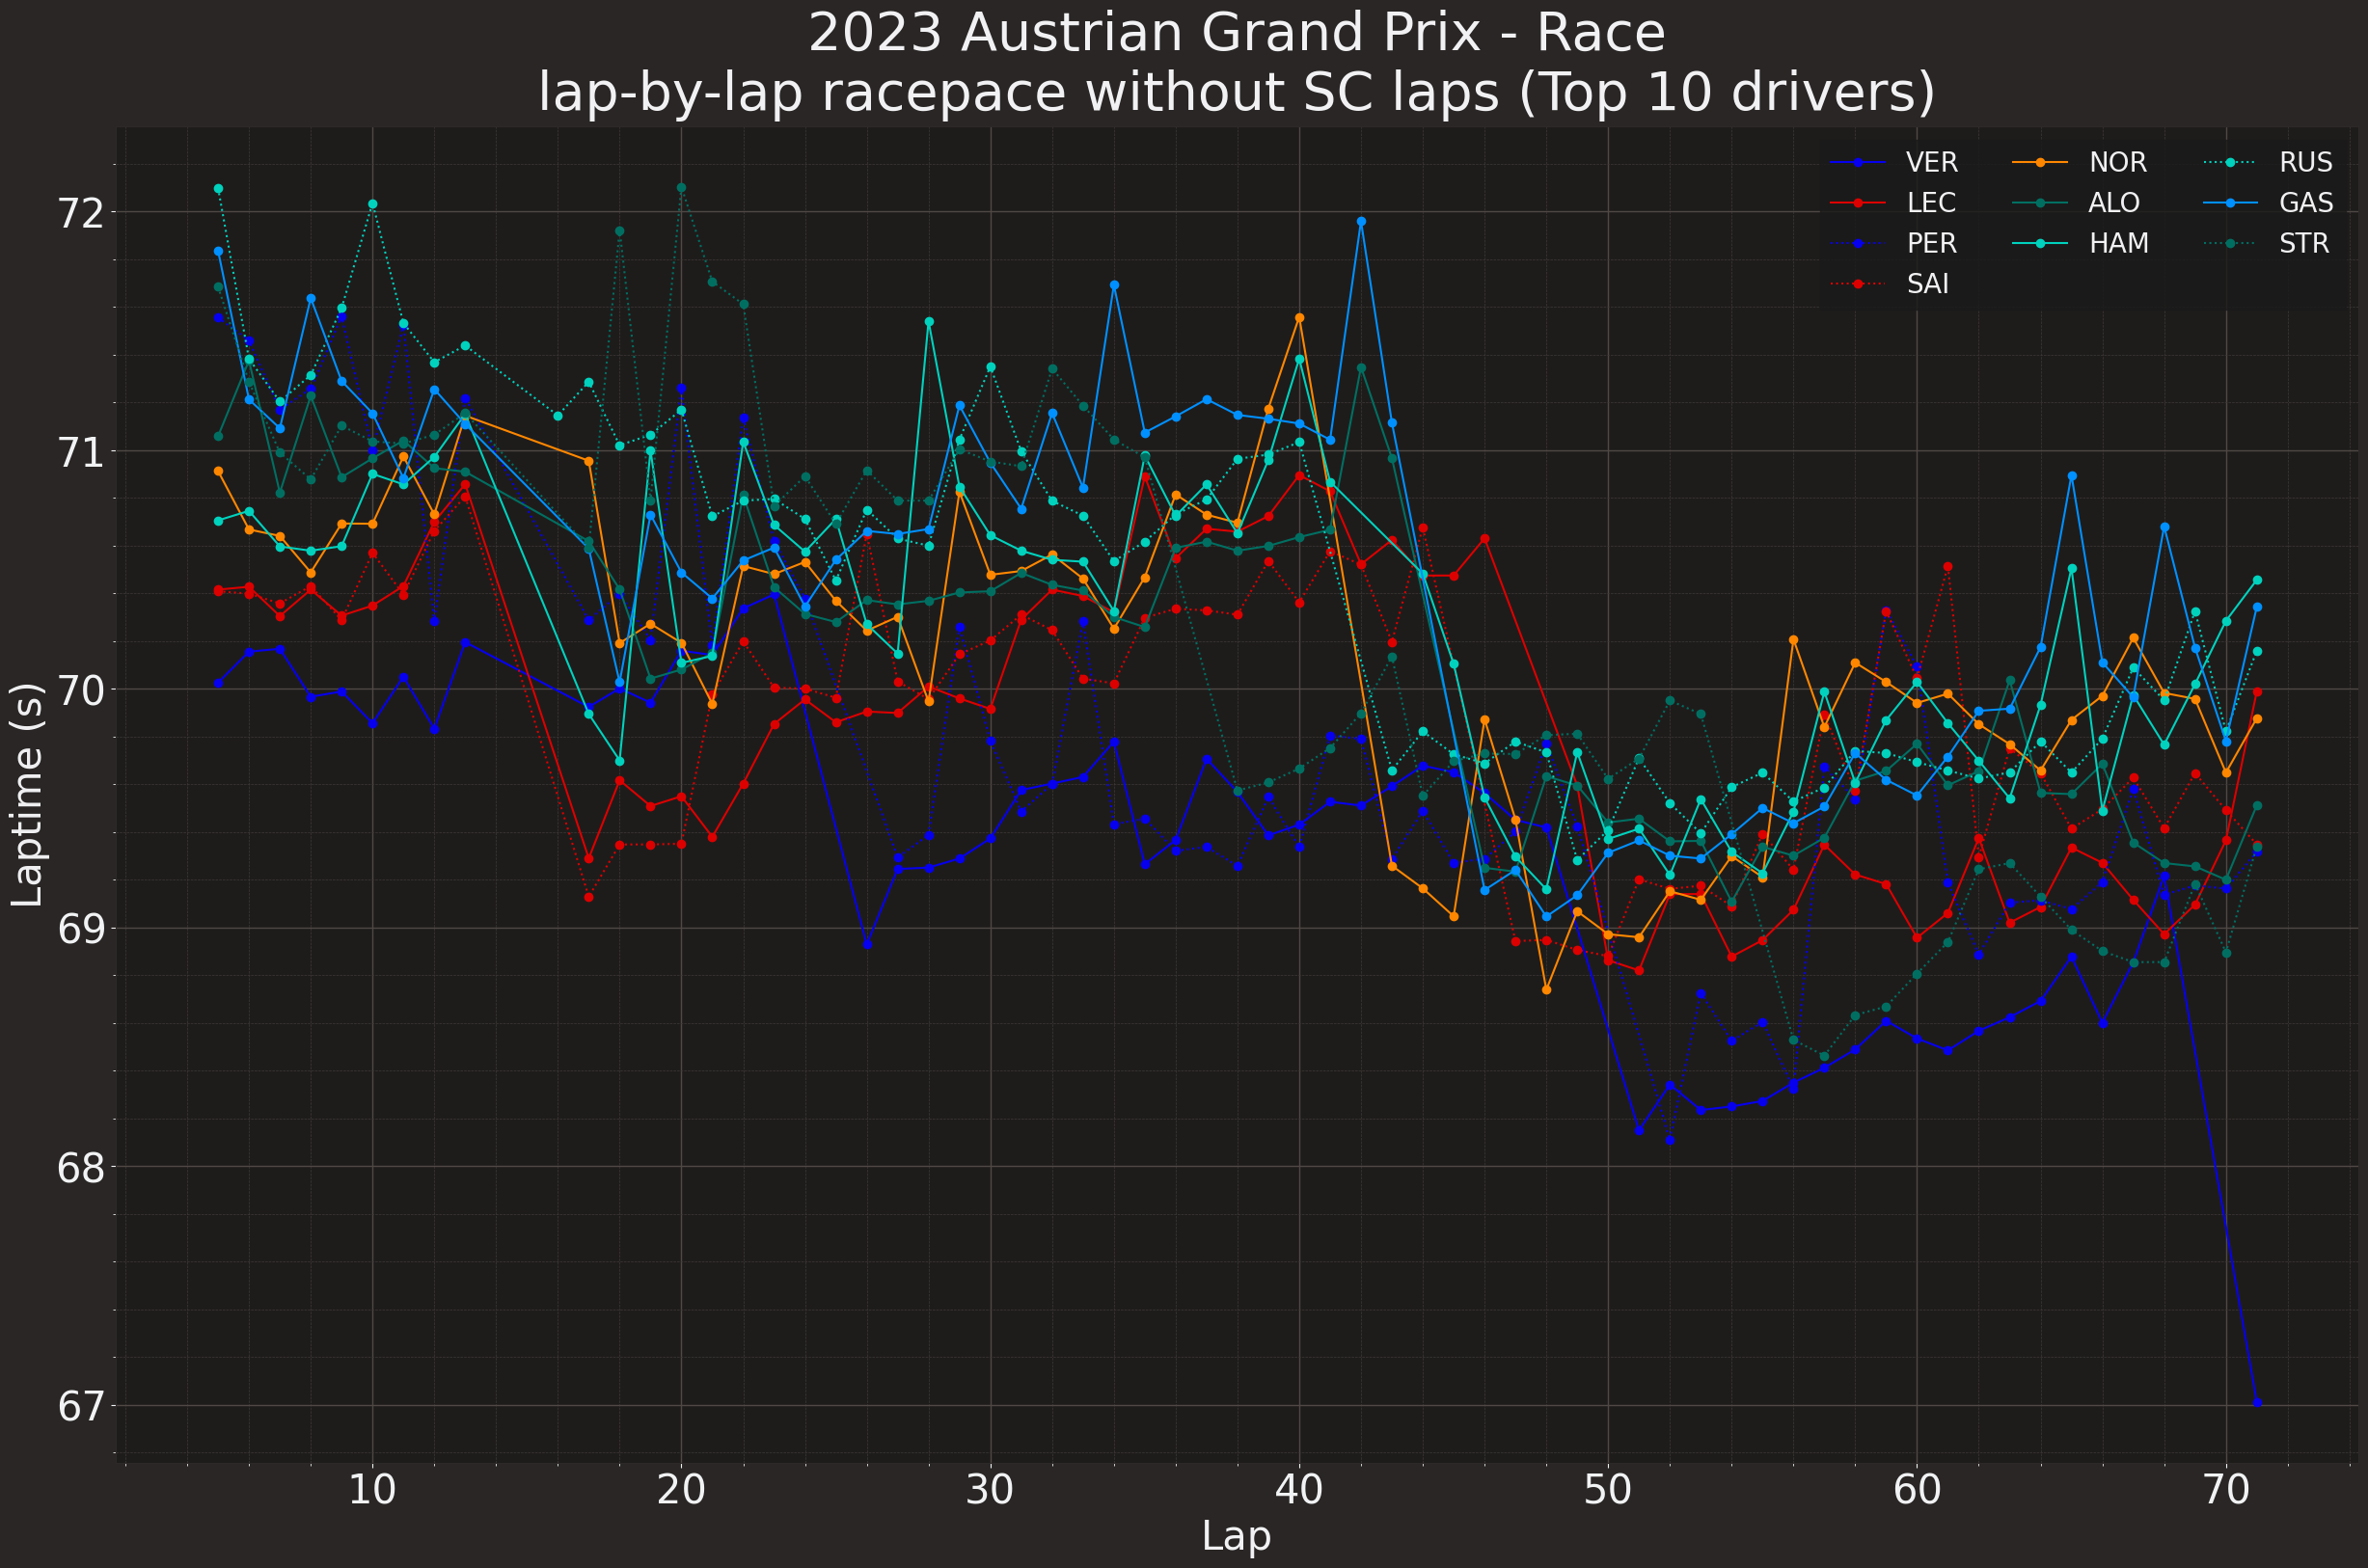

In [6]:
race_laps = fp.laps
drivers_to_visualize = ["VER", "LEC", "PER", "SAI", "NOR", "ALO", "HAM", "RUS", "GAS", "STR"]
race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull() & race_laps['IsAccurate']==True)]
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]
ff1.plotting.setup_mpl()
# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()
# Lap-by-lap longrun comparison
for driver in drivers_to_visualize:
    driver_laps = race_laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team', 'TyreLife']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    y = seconds=driver_laps['LapTimeSeconds']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, marker='o')
    
    # Append labels
    
    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nlap-by-lap racepace without SC laps (Top 10 drivers)", fontsize=40)
    ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
    ax.tick_params(labelsize=30)
   
    visualized_teams.append(team)

plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("Lap", fontsize=30)

In [ ]:
import fastf1.plotting
import matplotlib.pyplot as plt


fastf1.plotting.setup_mpl(misc_mpl_mods=False)
session = fastf1.get_session(2023, "Austria", 'R')
session.load(telemetry=False, weather=False)

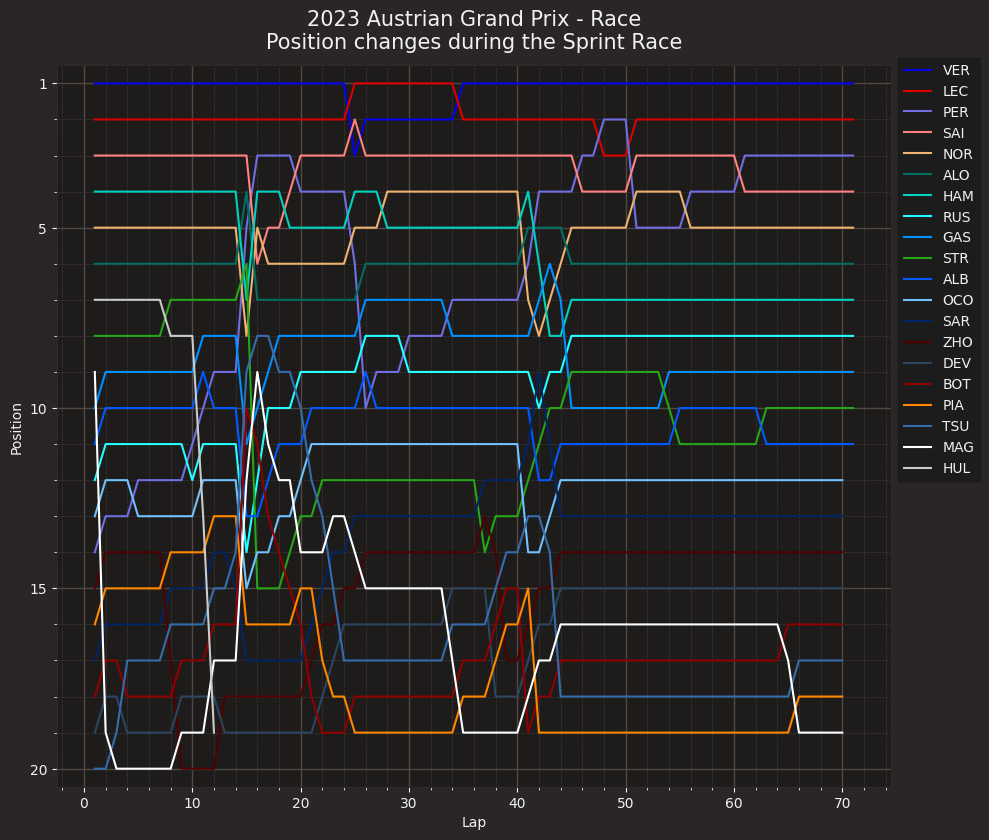

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)
    
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()
plt.title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nPosition changes during the Sprint Race", fontsize=15)
plt.show()

In [ ]:
import fastf1 as ff1
import pandas as pd
import matplotlib as matplotlib
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from collections import OrderedDict
from matplotlib.patches import Rectangle
import statistics

race = ff1.get_session(2023, 'Austria', 'R')
race.load()
race_laps = race.laps

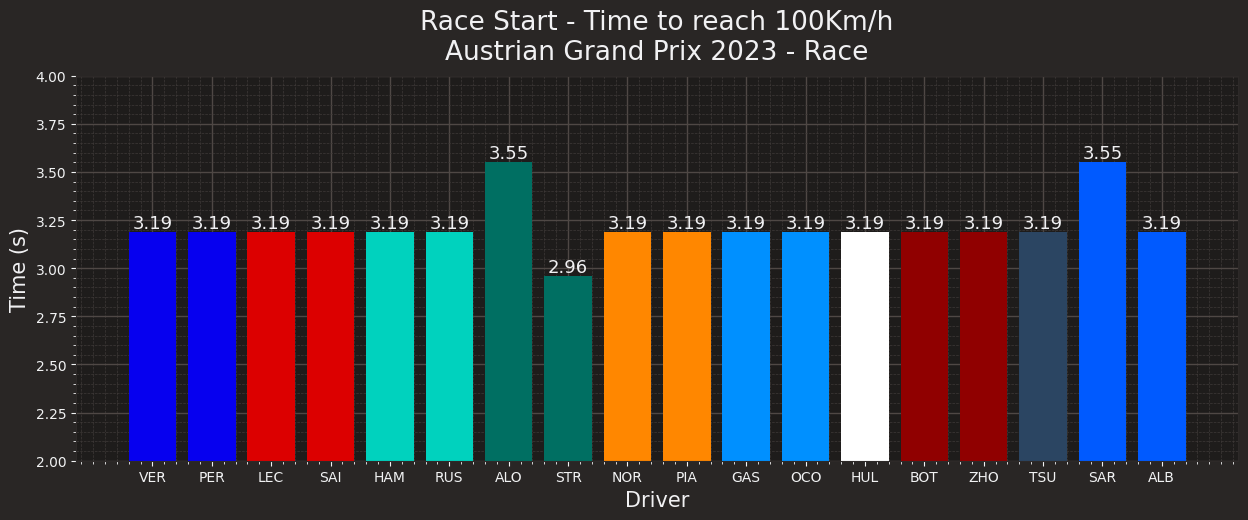

In [13]:
race_laps = race_laps.loc[race_laps['LapNumber']==1]
drivers = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'STR', 'NOR', 'PIA', 'GAS', 'OCO', 'HUL', 'BOT', 'ZHO', 'TSU', 'SAR', 'ALB']
tel_dict = dict.fromkeys(drivers)
time_dict = dict.fromkeys(drivers)

for driver in drivers:
        tel_dict[driver] = (race_laps.pick_driver(driver).get_car_data().query('Speed >= 100'))['Time'].iloc[0].total_seconds()       

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'STR', 'NOR', 'PIA', 'GAS', 'OCO', 'HUL', 'BOT', 'ZHO', 'TSU', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'), ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Alpine'), ff1.plotting.team_color('Alpine'),
               ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), ff1.plotting.team_color('Alfa Romeo'),
               ff1.plotting.team_color('Alpha Tauri'), 
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

tel_dict_ordered = OrderedDict((k, tel_dict[k]) for k in team_color_drvrs)
tel_dict_ordered = dict(tel_dict_ordered)

for key in tel_dict_ordered:
        tel_dict_ordered[key] = round(tel_dict_ordered[key], 2)

ff1.plotting.setup_mpl()
fig, ax = plt.subplots(figsize=(15, 5))
plt.bar_label(plt.bar(range(len(tel_dict_ordered)), list(tel_dict_ordered.values()), align='center', color=team_colors), fontsize = 13)
plt.xticks(range(len(tel_dict_ordered)), list(tel_dict_ordered.keys()))
plt.title(f"Race Start - Time to reach 100Km/h\n"
          f"{race.event['EventName']} {race.event.year} - {race.name}")
ax.set_ylim([2.0, 4.0])

plt.xlabel('Driver', fontsize=15)
plt.ylabel('Time (s)', fontsize=15)
plt.show()

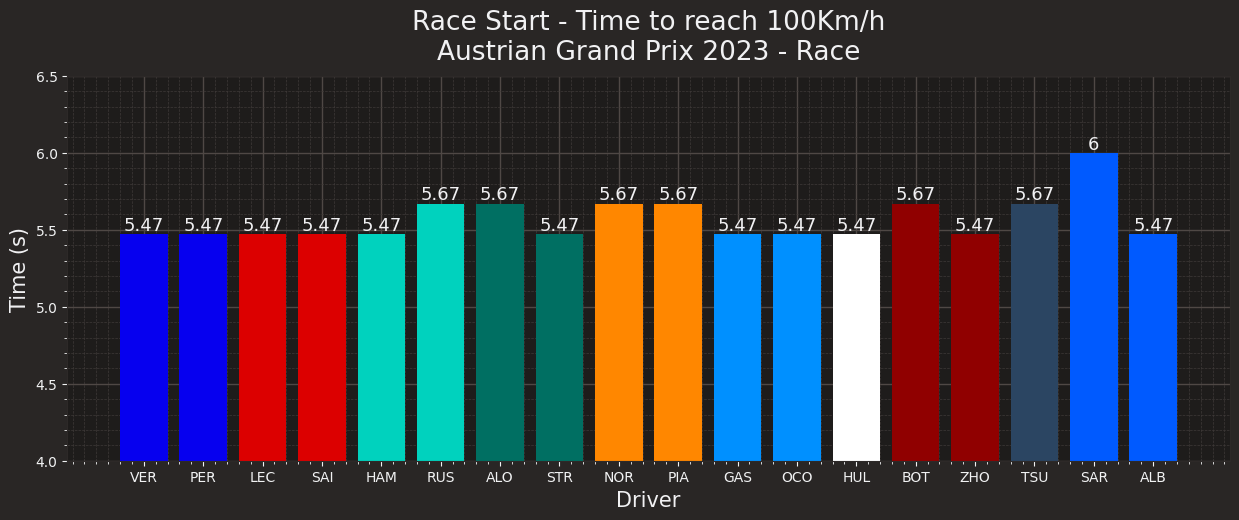

In [16]:
race_laps = race_laps.loc[race_laps['LapNumber']==1]
drivers = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'STR', 'NOR', 'PIA', 'GAS', 'OCO', 'HUL', 'BOT', 'ZHO', 'TSU', 'SAR', 'ALB']
tel_dict = dict.fromkeys(drivers)
time_dict = dict.fromkeys(drivers)

for driver in drivers:
        tel_dict[driver] = (race_laps.pick_driver(driver).get_car_data().query('Speed >= 200'))['Time'].iloc[0].total_seconds()       

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'STR', 'NOR', 'PIA', 'GAS', 'OCO', 'HUL', 'BOT', 'ZHO', 'TSU', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'), ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Alpine'), ff1.plotting.team_color('Alpine'),
               ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), ff1.plotting.team_color('Alfa Romeo'),
               ff1.plotting.team_color('Alpha Tauri'), 
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

tel_dict_ordered = OrderedDict((k, tel_dict[k]) for k in team_color_drvrs)
tel_dict_ordered = dict(tel_dict_ordered)

for key in tel_dict_ordered:
        tel_dict_ordered[key] = round(tel_dict_ordered[key], 2)

ff1.plotting.setup_mpl()
fig, ax = plt.subplots(figsize=(15, 5))
plt.bar_label(plt.bar(range(len(tel_dict_ordered)), list(tel_dict_ordered.values()), align='center', color=team_colors), fontsize = 13)
plt.xticks(range(len(tel_dict_ordered)), list(tel_dict_ordered.keys()))
plt.title(f"Race Start - Time to reach 100Km/h\n"
          f"{race.event['EventName']} {race.event.year} - {race.name}")
ax.set_ylim([4.0, 6.5])

plt.xlabel('Driver', fontsize=15)
plt.ylabel('Time (s)', fontsize=15)
plt.show()

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import fastf1.plotting
from math import pi


ff1.Cache.enable_cache('2023Austria') 
fp = ff1.get_session(2023, 'Austria', 'R')
fp.load()

Text(1500, 175, 'PIA avg: 226.51 Km/h')

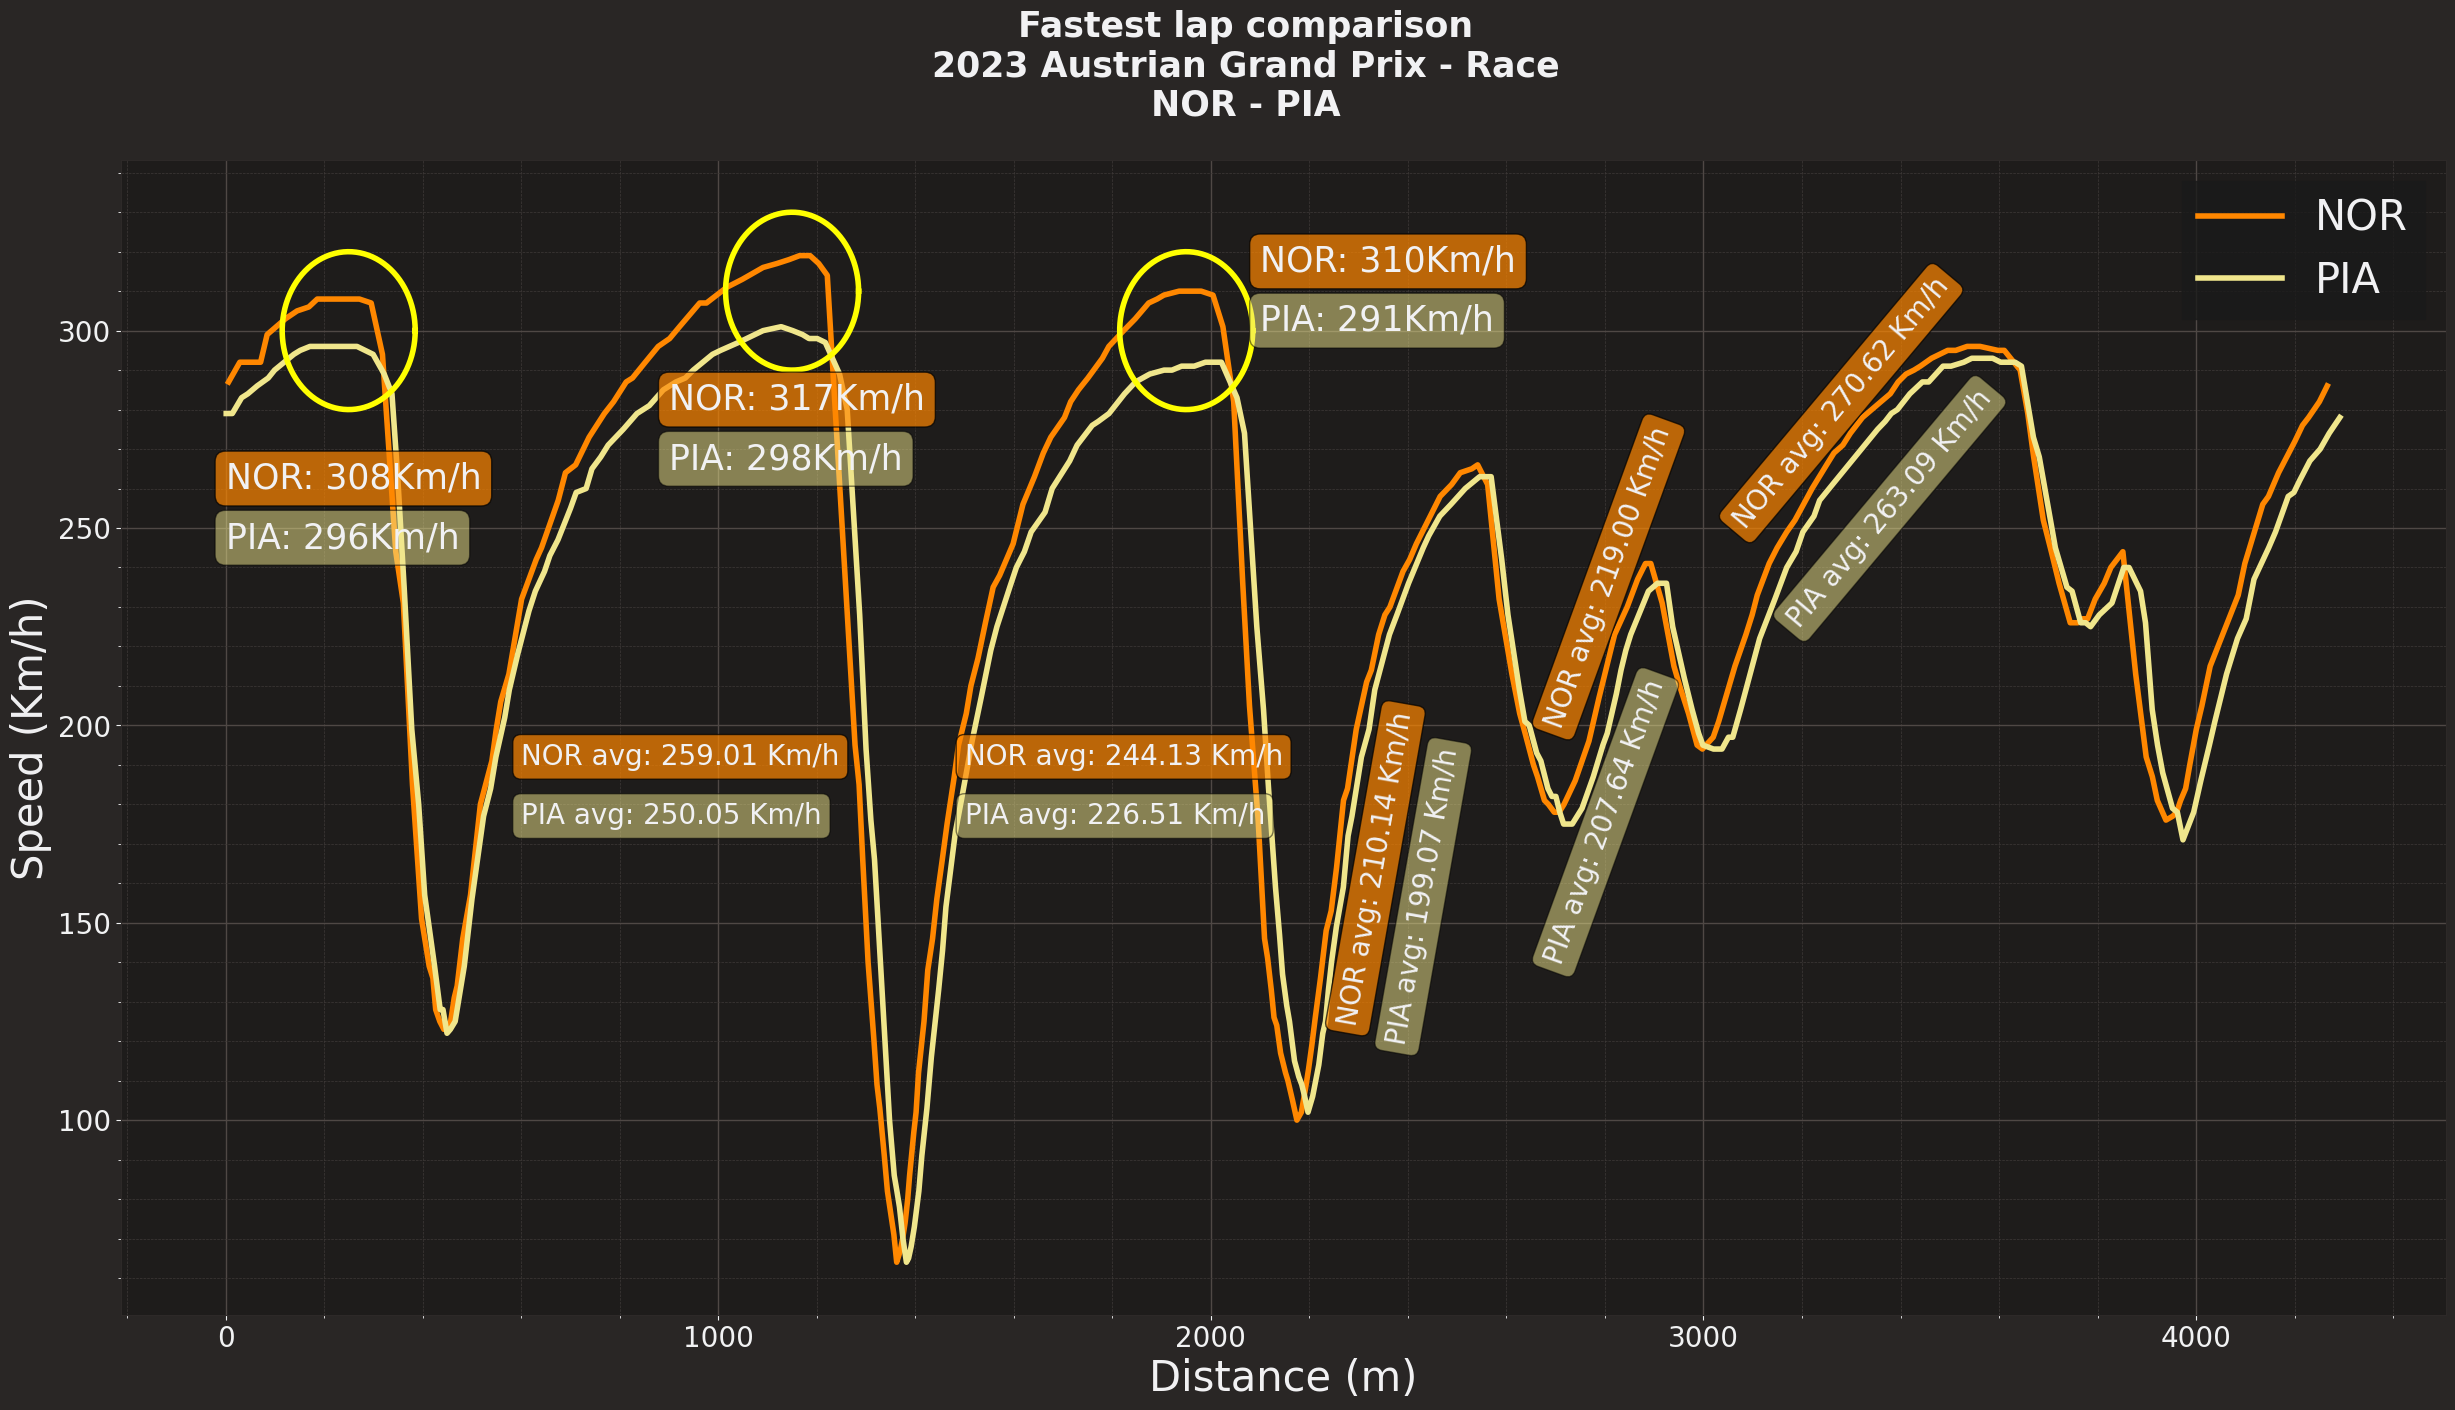

In [106]:
ff1.plotting.setup_mpl()

nor_lap = fp.laps.pick_driver("NOR").pick_fastest()
pia_lap = fp.laps.pick_driver('PIA').pick_fastest()

nor_tel = nor_lap.get_car_data().add_distance()
pia_tel = pia_lap.get_car_data().add_distance()

mcl_color = ff1.plotting.team_color('MCL')
mcl_color2 = "khaki"

fig1, ax1 = plt.subplots(1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
fig1.suptitle(f"Fastest lap comparison\n"f"{fp.event.year} {fp.event.EventName} - {fp.name}\n{nor_lap['Driver']} - {pia_lap['Driver']}", size = 25, weight='bold', ha='center')


ax1.plot(nor_tel['Distance'], nor_tel['Speed'], color = mcl_color, label = 'NOR', linewidth=4)
ax1.plot(pia_tel['Distance'], pia_tel['Speed'], color = mcl_color2, label = 'PIA', linewidth=4)

ax1.set_xlabel('Distance (m)', size=30)
ax1.set_ylabel('Speed (Km/h)', size=30)
ax1.tick_params(labelsize=20)
ax1.legend(prop={'size': 30})

u=250     #x-position of the center
v=300    #y-position of the center
a=135    #radius on the x-axis
b=20    #radius on the y-axis
t = np.linspace(0, 2*pi, 100)
ax1.plot( u+a*np.cos(t) , v+b*np.sin(t), color="yellow", linewidth=4)

nor_tel_speed = nor_tel.query('Distance >= 250')['Speed'].iloc[0]
pia_tel_speed = pia_tel.query('Distance >= 250')['Speed'].iloc[0]

ax1.text(x=0, y = 260, s = "NOR: " + str(nor_tel_speed) +"Km/h", fontsize=25, bbox=dict(boxstyle='round', facecolor=mcl_color, alpha=0.7))
ax1.text(x=0, y = 245, s = "PIA: " + str(pia_tel_speed) +"Km/h", fontsize=25, bbox=dict(boxstyle='round', facecolor=mcl_color2, alpha=0.5))

u=1150     #x-position of the center
v=310    #y-position of the center
a=135    #radius on the x-axis
b=20    #radius on the y-axis
t = np.linspace(0, 2*pi, 100)
ax1.plot( u+a*np.cos(t) , v+b*np.sin(t), color="yellow", linewidth=4)

nor_tel_speed = nor_tel.query('Distance >= 1200')['Speed'].iloc[0]
pia_tel_speed = pia_tel.query('Distance >= 1200')['Speed'].iloc[0]

ax1.text(x=900, y = 280, s = "NOR: " + str(nor_tel_speed) +"Km/h", fontsize=25, bbox=dict(boxstyle='round', facecolor=mcl_color, alpha=0.7))
ax1.text(x=900, y = 265, s = "PIA: " + str(pia_tel_speed) +"Km/h", fontsize=25, bbox=dict(boxstyle='round', facecolor=mcl_color2, alpha=0.5))

u=1950     #x-position of the center
v=300    #y-position of the center
a=135    #radius on the x-axis
b=20    #radius on the y-axis
t = np.linspace(0, 2*pi, 100)
ax1.plot( u+a*np.cos(t) , v+b*np.sin(t), color="yellow", linewidth=4)

nor_tel_speed = nor_tel.query('Distance >= 1950')['Speed'].iloc[0]
pia_tel_speed = pia_tel.query('Distance >= 1950')['Speed'].iloc[0]

ax1.text(x=2100, y = 315, s = "NOR: " + str(nor_tel_speed) +"Km/h", fontsize=25, bbox=dict(boxstyle='round', facecolor=mcl_color, alpha=0.7))
ax1.text(x=2100, y = 300, s = "PIA: " + str(pia_tel_speed) +"Km/h", fontsize=25, bbox=dict(boxstyle='round', facecolor=mcl_color2, alpha=0.5))

########## Velocità medie ##########
first_nor_time=nor_tel.loc[nor_tel['Distance'] >= 2200, 'Time'].iloc[0] #912
last_nor_time=nor_tel.loc[nor_tel['Distance'] >= 2500, 'Time'].iloc[0] #1505
diff_nor_time = last_nor_time - first_nor_time
distance_travelled_nor = nor_tel.loc[nor_tel['Time'] == last_nor_time, 'Distance'].iloc[0] - nor_tel.loc[nor_tel['Time'] == first_nor_time, 'Distance'].iloc[0]
mean_speed_nor = (distance_travelled_nor)/(diff_nor_time.total_seconds())
nor_mean_kmh = mean_speed_nor*3.6

first_pia_time=pia_tel.loc[pia_tel['Distance'] >= 2200, 'Time'].iloc[0] #912
last_pia_time=pia_tel.loc[pia_tel['Distance'] >= 2500, 'Time'].iloc[0] #1505
diff_pia_time = last_pia_time - first_pia_time
distance_travelled_pia = pia_tel.loc[pia_tel['Time'] == last_pia_time, 'Distance'].iloc[0] - pia_tel.loc[pia_tel['Time'] == first_pia_time, 'Distance'].iloc[0]
mean_speed_pia = (distance_travelled_pia)/(diff_pia_time.total_seconds())
pia_mean_kmh=mean_speed_pia*3.6

ax1.text(2250, 125, "NOR avg: "+str(nor_mean_kmh)[0:6]+" Km/h", rotation=80, fontsize=20, bbox=dict(boxstyle='round', facecolor=mcl_color, alpha=0.7))
ax1.text(2350, 120, "PIA avg: "+str(pia_mean_kmh)[0:6]+" Km/h", rotation=80, fontsize=20, bbox=dict(boxstyle='round', facecolor=mcl_color2, alpha=0.5))



first_nor_time=nor_tel.loc[nor_tel['Distance'] >= 2730, 'Time'].iloc[0] #912
last_nor_time=nor_tel.loc[nor_tel['Distance'] >= 2890, 'Time'].iloc[0] #1505
diff_nor_time = last_nor_time - first_nor_time
distance_travelled_nor = nor_tel.loc[nor_tel['Time'] == last_nor_time, 'Distance'].iloc[0] - nor_tel.loc[nor_tel['Time'] == first_nor_time, 'Distance'].iloc[0]
mean_speed_nor = (distance_travelled_nor)/(diff_nor_time.total_seconds())
nor_mean_kmh = mean_speed_nor*3.6

first_pia_time=pia_tel.loc[pia_tel['Distance'] >= 2730, 'Time'].iloc[0] #912
last_pia_time=pia_tel.loc[pia_tel['Distance'] >= 2890, 'Time'].iloc[0] #1505
diff_pia_time = last_pia_time - first_pia_time
distance_travelled_pia = pia_tel.loc[pia_tel['Time'] == last_pia_time, 'Distance'].iloc[0] - pia_tel.loc[pia_tel['Time'] == first_pia_time, 'Distance'].iloc[0]
mean_speed_pia = (distance_travelled_pia)/(diff_pia_time.total_seconds())
pia_mean_kmh=mean_speed_pia*3.6

ax1.text(2670, 200, "NOR avg: "+str(nor_mean_kmh)[0:6]+" Km/h", rotation=70, fontsize=20, bbox=dict(boxstyle='round', facecolor=mcl_color, alpha=0.7))
ax1.text(2670, 140, "PIA avg: "+str(pia_mean_kmh)[0:6]+" Km/h", rotation=70, fontsize=20, bbox=dict(boxstyle='round', facecolor=mcl_color2, alpha=0.5))




first_nor_time=nor_tel.loc[nor_tel['Distance'] >= 3050, 'Time'].iloc[0] #912
last_nor_time=nor_tel.loc[nor_tel['Distance'] >= 3600, 'Time'].iloc[0] #1505
diff_nor_time = last_nor_time - first_nor_time
distance_travelled_nor = nor_tel.loc[nor_tel['Time'] == last_nor_time, 'Distance'].iloc[0] - nor_tel.loc[nor_tel['Time'] == first_nor_time, 'Distance'].iloc[0]
mean_speed_nor = (distance_travelled_nor)/(diff_nor_time.total_seconds())
nor_mean_kmh = mean_speed_nor*3.6

first_pia_time=pia_tel.loc[pia_tel['Distance'] >= 3050, 'Time'].iloc[0] #912
last_pia_time=pia_tel.loc[pia_tel['Distance'] >= 3600, 'Time'].iloc[0] #1505
diff_pia_time = last_pia_time - first_pia_time
distance_travelled_pia = pia_tel.loc[pia_tel['Time'] == last_pia_time, 'Distance'].iloc[0] - pia_tel.loc[pia_tel['Time'] == first_pia_time, 'Distance'].iloc[0]
mean_speed_pia = (distance_travelled_pia)/(diff_pia_time.total_seconds())
pia_mean_kmh=mean_speed_pia*3.6

ax1.text(3050, 250, "NOR avg: "+str(nor_mean_kmh)[0:6]+" Km/h", rotation=50, fontsize=20, bbox=dict(boxstyle='round', facecolor=mcl_color, alpha=0.7))
ax1.text(3160, 225, "PIA avg: "+str(pia_mean_kmh)[0:6]+" Km/h", rotation=50, fontsize=20, bbox=dict(boxstyle='round', facecolor=mcl_color2, alpha=0.5))







first_nor_time=nor_tel.loc[nor_tel['Distance'] >= 450, 'Time'].iloc[0] #912
last_nor_time=nor_tel.loc[nor_tel['Distance'] >= 1200, 'Time'].iloc[0] #1505
diff_nor_time = last_nor_time - first_nor_time
distance_travelled_nor = nor_tel.loc[nor_tel['Time'] == last_nor_time, 'Distance'].iloc[0] - nor_tel.loc[nor_tel['Time'] == first_nor_time, 'Distance'].iloc[0]
mean_speed_nor = (distance_travelled_nor)/(diff_nor_time.total_seconds())
nor_mean_kmh = mean_speed_nor*3.6

first_pia_time=pia_tel.loc[pia_tel['Distance'] >= 450, 'Time'].iloc[0] #912
last_pia_time=pia_tel.loc[pia_tel['Distance'] >= 1200, 'Time'].iloc[0] #1505
diff_pia_time = last_pia_time - first_pia_time
distance_travelled_pia = pia_tel.loc[pia_tel['Time'] == last_pia_time, 'Distance'].iloc[0] - pia_tel.loc[pia_tel['Time'] == first_pia_time, 'Distance'].iloc[0]
mean_speed_pia = (distance_travelled_pia)/(diff_pia_time.total_seconds())
pia_mean_kmh=mean_speed_pia*3.6

ax1.text(600, 190, "NOR avg: "+str(nor_mean_kmh)[0:6]+" Km/h", rotation=0, fontsize=20, bbox=dict(boxstyle='round', facecolor=mcl_color, alpha=0.7))
ax1.text(600, 175, "PIA avg: "+str(pia_mean_kmh)[0:6]+" Km/h", rotation=0, fontsize=20, bbox=dict(boxstyle='round', facecolor=mcl_color2, alpha=0.5))






first_nor_time=nor_tel.loc[nor_tel['Distance'] >= 1400, 'Time'].iloc[0] #912
last_nor_time=nor_tel.loc[nor_tel['Distance'] >= 1950, 'Time'].iloc[0] #1505
diff_nor_time = last_nor_time - first_nor_time
distance_travelled_nor = nor_tel.loc[nor_tel['Time'] == last_nor_time, 'Distance'].iloc[0] - nor_tel.loc[nor_tel['Time'] == first_nor_time, 'Distance'].iloc[0]
mean_speed_nor = (distance_travelled_nor)/(diff_nor_time.total_seconds())
nor_mean_kmh = mean_speed_nor*3.6

first_pia_time=pia_tel.loc[pia_tel['Distance'] >= 1400, 'Time'].iloc[0] #912
last_pia_time=pia_tel.loc[pia_tel['Distance'] >= 1950, 'Time'].iloc[0] #1505
diff_pia_time = last_pia_time - first_pia_time
distance_travelled_pia = pia_tel.loc[pia_tel['Time'] == last_pia_time, 'Distance'].iloc[0] - pia_tel.loc[pia_tel['Time'] == first_pia_time, 'Distance'].iloc[0]
mean_speed_pia = (distance_travelled_pia)/(diff_pia_time.total_seconds())
pia_mean_kmh=mean_speed_pia*3.6

ax1.text(1500, 190, "NOR avg: "+str(nor_mean_kmh)[0:6]+" Km/h", rotation=0, fontsize=20, bbox=dict(boxstyle='round', facecolor=mcl_color, alpha=0.7))
ax1.text(1500, 175, "PIA avg: "+str(pia_mean_kmh)[0:6]+" Km/h", rotation=0, fontsize=20, bbox=dict(boxstyle='round', facecolor=mcl_color2, alpha=0.5))


